<center>Заметка 1. 	Повторение. Основные распределения, статистики, гипотезы.</center>
<center>курс <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1. 11 февраля 2022 г.</center>

# Основные понятия

<b>Дискретная</b> случайная величина $X$ принимает счётное множество значений $A = \{a_1, a_2,...\}$ с вероятностями $p_1,p_2, ..., \sum_i p_i = 1$. 

$f_X(a_i) = P(X=a_i)=p_i$ - <b>функция вероятности</b>.

<b>Непрерывная</b> случайная величина задается с помощью функции <b>распределения</b>:
    $$F_X(x)=P(X\le x)$$
или <b>плотности распределения</b>:  
    $$f_X(x): \int\limits_a^{b} f_x(x)dx = P(a \le X \le b)$$

## Характеристики распределений

- <b>Мат.ожидание</b> - среднее значение $X$:  
$$\mathbb{E}X = \int xdF(x)$$

- <b>Дисперсия</b> - мера разброса $X$:  
$$\mathbb{D}X = \mathbb{E}((X-\mathbb{E}X)^2)$$

- <b>Квантиль</b> порядка $\alpha \in (0,1)$:
$$X_\alpha: P(X \le X_\alpha) \ge \alpha, \quad P(X \ge X_\alpha) \ge 1-\alpha$$
- <b>Медиана</b> - квантиль порядка 0.5, центральное значение   
распределения:  
$$\operatorname{med} X: P(X \le \operatorname{med} X) \ge 0.5, \quad P(X \ge \operatorname{med} X) \ge 0.5$$
- <b>Интерквартильный размах</b>:
$$IQR . = X_{0.75} - X_{0.25}$$
- <b>Мода</b> - точка максимума функции вероятности или плотности:
$$\operatorname{mode} X = \operatorname{argmax}_x f(x)$$
- <b>Коэффициент ассиметрии</b> (skewness)
$$\gamma_1 = \mathbb{E}\bigg(\frac{X- \mathbb{E}X}{\sqrt{\mathbb{D}X}}\bigg)^3$$

In [23]:
from scipy.stats import skewnorm, skew
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

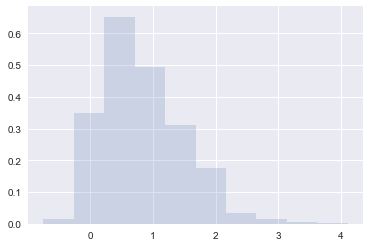

In [38]:
array_skew = skewnorm.rvs(5, size=1000)
plt.hist(array_skew, density=True, alpha=0.2)
plt.show()

In [39]:
skew(array_skew)

0.7987941163960584

- <b>Коэффициент эксцесса</b> (excess, без вычитания тройки - kurtosis) 
$$\gamma_2 = \frac {\mathbb{E}(X-\mathbb{E}X)^4}{(\mathbb{D}X)^2}-3$$

In [76]:
from scipy.stats import kurtosis 
from scipy.stats import logistic, laplace, norm
x = np.linspace(-5,5,1000)

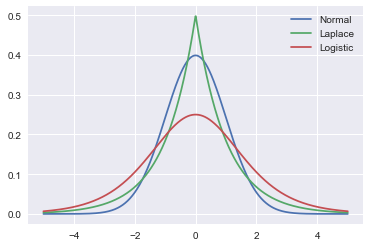

In [77]:
plt.plot(x, norm.pdf(x), label = 'Normal')
plt.plot(x, laplace.pdf(x), label = 'Laplace')
plt.plot(x, logistic.pdf(x), label = 'Logistic')
plt.legend(loc='best')

______

## Статистики

### Нормальное распределение

$X \in \mathbb{R} \sim N(\mu,\sigma^2),\quad \sigma^2 > 0$

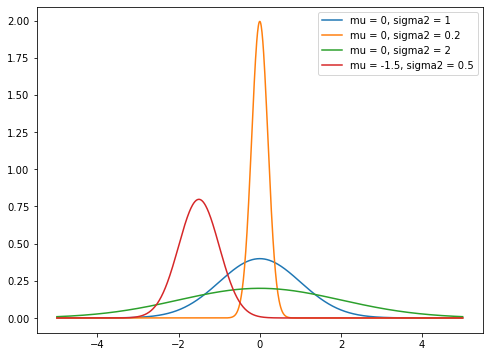

In [6]:
plt.figure(figsize=(8,6))
plt.plot(x, norm.pdf(x,0,1), label = 'mu = 0, sigma2 = 1')
plt.plot(x, norm.pdf(x,0,0.2), label = 'mu = 0, sigma2 = 0.2')
plt.plot(x, norm.pdf(x,0,2), label = 'mu = 0, sigma2 = 2')
plt.plot(x, norm.pdf(x,-1.5,0.5), label = 'mu = -1.5, sigma2 = 0.5')
plt.legend(loc='best')

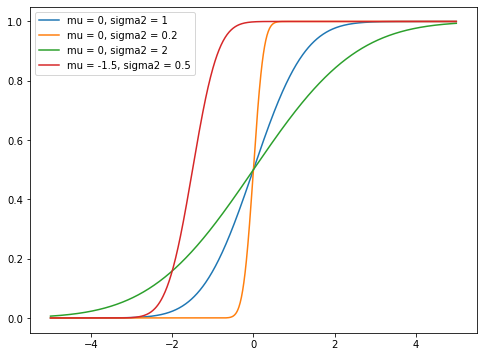

In [7]:
plt.figure(figsize=(8,6))
plt.plot(x, norm.cdf(x,0,1), label = 'mu = 0, sigma2 = 1')
plt.plot(x, norm.cdf(x,0,0.2), label = 'mu = 0, sigma2 = 0.2')
plt.plot(x, norm.cdf(x,0,2), label = 'mu = 0, sigma2 = 2')
plt.plot(x, norm.cdf(x,-1.5,0.5), label = 'mu = -1.5, sigma2 = 0.5')
plt.legend(loc='best')

- Предельное распределение суммы слабо взаимозависимых сл. в.   

- $\mathbb{E}X=\operatorname{med}X=\operatorname{mode}X=\mu, \mathbb{D}X=\sigma^2$, все моменты более высокого порядка нулевые  

- Пусть $X_1,\ldots,X_n$ независимы, $X_i \sim N(\mu_i,\sigma_{i}^2)$, тогда $\forall a_i, \ldots, a_n$  
$$\sum\limits_{i=1}^{n} \alpha_i X_i \sim  N\bigg(\sum\limits_{i=1}^n a_i \mu_i, \sum\limits_{i=1}^n a_{i}^2 \sigma^{2}_i\bigg)$$  

- Центральная предельная теорема: пусть $X_1,\ldots, X_n$ i.i.d. с $\mathbb{E}X$ и
    $\mathbb{D}X < \infty$, тогда  
    $$\frac{1}{n}\sum\limits_{i=1}^{n} X_i\sim\approx N \bigg(\mathbb{E}X, \frac{\mathbb{D}X}{n}\bigg)$$  
    
- Пример: погрешность измерения

### Распределение хи-квадрат

$X \in \mathbb{R}_+ \sim \chi^{2}_{k}, k \in \mathbb{N}$

In [8]:
from scipy.stats import chi2

In [9]:
xchi = np.linspace(0,10,1000)

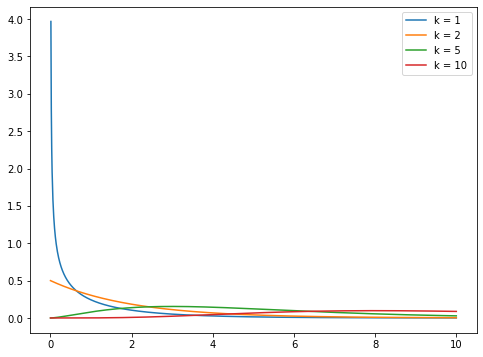

In [10]:
plt.figure(figsize=(8,6))
plt.plot(xchi, chi2.pdf(xchi,1), label='k = 1')
plt.plot(xchi, chi2.pdf(xchi,2), label='k = 2')
plt.plot(xchi, chi2.pdf(xchi,5), label='k = 5')
plt.plot(xchi, chi2.pdf(xchi,10), label='k = 10')
plt.legend(loc='best')

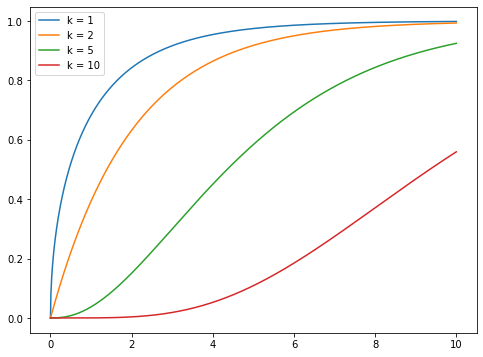

In [11]:
plt.figure(figsize=(8,6))
plt.plot(xchi, chi2.cdf(xchi,1), label = 'k = 1')
plt.plot(xchi, chi2.cdf(xchi,2), label = 'k = 2')
plt.plot(xchi, chi2.cdf(xchi,5), label = 'k = 5')
plt.plot(xchi, chi2.cdf(xchi,10), label = 'k = 10')
plt.legend(loc='best')

- Пусть $X_1,\ldots,X_k$ - i.i.d., $\quad X_i \sim N(0,1)$, тогда
$$\sum\limits_{i=1}^{n} X^{2}_i \sim \chi^{2}_k$$  
- Пример: нормированная выборочная дисперсия $$(n-1)\frac{S^{2}_n}{\sigma^2} \sim \chi^2_{n-1}$$

### Распределение Стьюдента

$X \in \mathbb{R} \sim St(v), v >0$

In [12]:
from scipy.stats import t

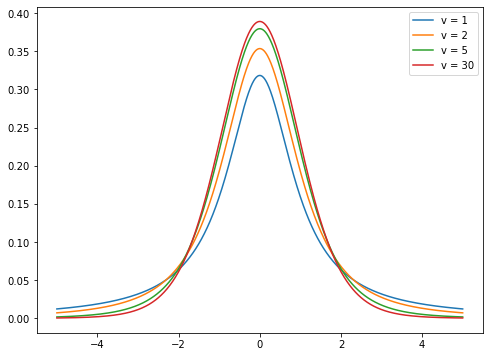

In [13]:
plt.figure(figsize=(8,6))
plt.plot(x, t.pdf(x,1), label='v = 1')
plt.plot(x, t.pdf(x,2), label='v = 2')
plt.plot(x, t.pdf(x,5), label='v = 5')
plt.plot(x, t.pdf(x,10), label='v = 30')
plt.legend(loc='best')

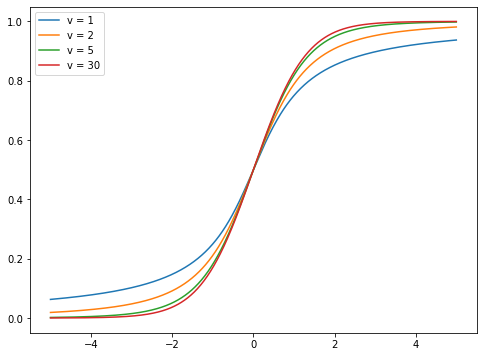

In [14]:
plt.figure(figsize=(8,6))
plt.plot(x, t.cdf(x,1), label='v = 1')
plt.plot(x, t.cdf(x,2), label='v = 2')
plt.plot(x, t.cdf(x,5), label='v = 5')
plt.plot(x, t.cdf(x,10), label='v = 30')
plt.legend(loc='best')

- $\mathbb{E}X=0$ при $v>1$, $\operatorname{med}X=\operatorname{mode}X=0$
- Пусть $Z \sim N(0,1)$ и $V \sim \chi^{2}_{v}$, тогда
$$T = \frac{Z}{\sqrt{V/v}} \sim St(v)$$
- Если $X \sim St(v)$, то 
$$Y = \lim\limits_{v \to \infty }X \sim N(0,1)$$
- Возникает при оценке среднего значения сл. в. с неизвестной дисперсией

### Распределение Фишера

$X \in \mathbb{R}_+ F(d_1, d_2), d_1,d_2 > 0$

- пусть $X_1 \sim \chi^2_{d_1}, X_2 \sim \chi^2_{d_2}, X_1$ и $X_2$ независимы, тогда
$\frac{X_1/d_1}{X_2/d2} \sim F(d_1, d_2)$
- если $X \sim F(d_1, d_2)$, то $Y = \lim_{d_2 \to \infty} d_1 X \sim \chi^2_{d_1} $
- $F(x, d_1, d_2) = F(1/x, d_2, d_1)$
- возникает в дисперсионном и регрессионном анализе

In [15]:
from scipy.stats import f

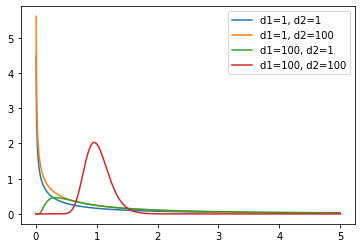

In [16]:
x1 = np.linspace(0,5,1000)
plt.plot(x1, f.pdf(x1,1, 1), label='d1=1, d2=1')
plt.plot(x1, f.pdf(x1,1, 100), label='d1=1, d2=100')
plt.plot(x1, f.pdf(x1,100, 1), label='d1=100, d2=1')
plt.plot(x1, f.pdf(x1,100, 100), label='d1=100, d2=100')
plt.legend(loc='best')

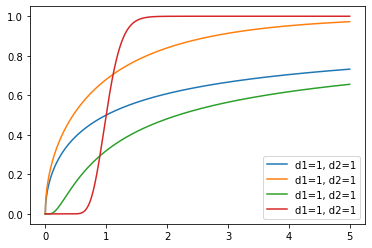

In [17]:
plt.plot(x1, f.cdf(x1, 1, 1), label='d1=1, d2=1')
plt.plot(x1, f.cdf(x1, 1, 100), label='d1=1, d2=1')
plt.plot(x1, f.cdf(x1, 100, 1), label='d1=1, d2=1')
plt.plot(x1, f.cdf(x1, 100, 100), label='d1=1, d2=1')
plt.legend(loc='best')

### Биномиальное распределение

$X \in \{0,..., N\} \sim Bin(N,p), N \in \mathbb{N}, p \in [0,1]$

- пусть $X_1, ..., X_n$ независимы, $X_i \sim Ber(p)$, тогда $\sum_{i=1}^{n}X_i \sim Bin(n,p)$
- $Bin(1,p) = Ber(p)$
- если $N > 20$ и $p$ не слишком близко к нулю или единице, то для $X \sim Bin(N,p)$ справедлива нормальная апроксимация 
$F_X(x) = \Phi \Big(\frac{x - Np}{\sqrt{Np(1-p)}}\Big)$
- пример: число попаданий из N бросков в баскетбольное кольцо

In [18]:
from scipy.stats import binom
import seaborn as sns

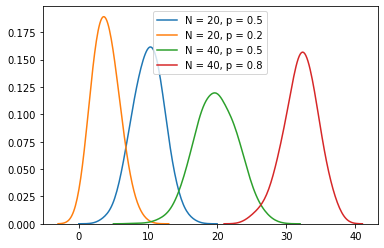

In [19]:
sns.kdeplot(binom.rvs(n=20, p=0.5, loc=0, size=1000), bw=1, label='N = 20, p = 0.5')
sns.kdeplot(binom.rvs(n=20, p=0.2, loc=0, size=1000), bw=1, label='N = 20, p = 0.2')
sns.kdeplot(binom.rvs(n=40, p=0.5, loc=0, size=1000), bw=1, label='N = 40, p = 0.5')
sns.kdeplot(binom.rvs(n=40, p=0.8, loc=0, size=1000), bw=1, label='N = 40, p = 0.8')
plt.legend(loc='best')

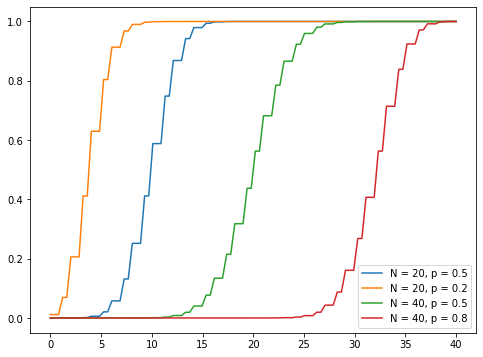

In [20]:
x = np.linspace(0,40,100)
plt.figure(figsize=(8,6))
plt.plot(x, binom.cdf(x, 20, 0.5), label='N = 20, p = 0.5')
plt.plot(x, binom.cdf(x, 20, 0.2), label='N = 20, p = 0.2')
plt.plot(x, binom.cdf(x, 40, 0.5), label='N = 40, p = 0.5')
plt.plot(x, binom.cdf(x, 40, 0.8), label='N = 40, p = 0.8')
plt.legend(loc='best')

______

# Эксперимент Майкельсона

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

In [4]:
speed = np.genfromtxt('speed.txt')
speed

array([299850., 299740., 299900., 300070., 299930., 299850., 299950.,
       299980., 299980., 299880., 300000., 299980., 299930., 299650.,
       299760., 299810., 300000., 300000., 299960., 299960., 299960.,
       299940., 299960., 299940., 299880., 299800., 299850., 299880.,
       299900., 299840., 299830., 299790., 299810., 299880., 299880.,
       299830., 299800., 299790., 299760., 299800., 299880., 299880.,
       299880., 299860., 299720., 299720., 299620., 299860., 299970.,
       299950., 299880., 299910., 299850., 299870., 299840., 299840.,
       299850., 299840., 299840., 299840., 299890., 299810., 299810.,
       299820., 299800., 299770., 299760., 299740., 299750., 299760.,
       299910., 299920., 299890., 299860., 299880., 299720., 299840.,
       299850., 299850., 299780., 299890., 299840., 299780., 299810.,
       299760., 299810., 299790., 299810., 299820., 299850., 299870.,
       299870., 299810., 299740., 299810., 299940., 299950., 299800.,
       299810., 2998

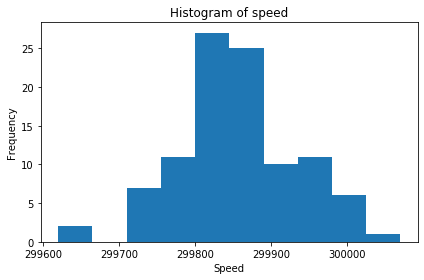

In [23]:
plt.hist(speed)
plt.title('Histogram of speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.tight_layout()

Можно ли считать наблюдения нормально распределёнными?

## Анализ данных

1. Постройте на одном графике оцененную при помощи ядрового метода сглаженную гистограмму (оценку плотности распределения), а также кривую плотности нормального распределения с параметрами, оцененным по выборке. (Вам помогут функции `gaussian_kde` и `norm.pdf`, из `scipy.stats`)

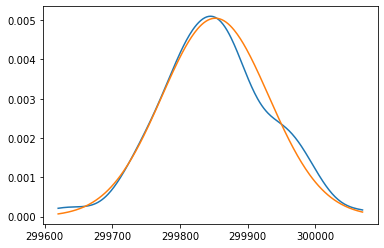

In [9]:
from scipy.stats import gaussian_kde, norm
import statistics
density = gaussian_kde(speed)
x = np.linspace(min(speed), max(speed), 300)
plt.plot(x, density(x))
plt.plot(x, norm.pdf(x, statistics.mean(speed), statistics.stdev(speed)))

2. Постройте на одном графике эмпирическую плотности распределения (emperical CDF), а также кривую плотности распределения нормального распределения (CDF) с параметрами, оцененным по выборке.(Используйте `ECDF` из `statsmodels.api`)

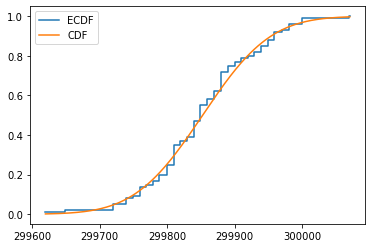

In [11]:
import statsmodels.api as sm 
ecdf = sm.distributions.ECDF(speed)
y = ecdf(x)
plt.step(x, y, label='ECDF')
plt.plot(x, norm.cdf(x, statistics.mean(speed), statistics.stdev(speed)), label='CDF')
plt.legend(loc='best')

Статистика $T(X^n)$ - любая измеримая функция выборки.
- выборочное среднее:
$$\bar{X} = \frac{1}{n}\sum\limits_{i=1}^n X_i$$
- выборочная дисперсия:
$$S^2 = \frac{1}{n-1}\sum\limits_{i=1}^{n}(X_i - \bar{X})^2$$

\
Вариационный ряд:
$$X_{(1)} \le X_{(2)} \le \ldots \le X_{(n)}$$
Ранг элемента выборки X_i:
$$\operatorname{rank}(X_i) = r: X_i = X_{(r)}$$

- $k$-я порядковая статистика: $X_{(k)}$
- выборочный $\alpha$-квантиль: $X_{([n\alpha])}$
- выборочный интерквартильный размах
$$IQR_n = X_{([0.75n])} - X_{([0.25n])}$$

### Оценки центральной тенденции

Выборочное среднее — среднее арифметическое по выборке.  
Выборочная медиана — центральный элемент вариационного ряда.   
Выборочная мода — самое распространённое значение в выборке.  

In [26]:
import statistics
income = [45000, 
          15000,
          10000, 10000,
          5700, 
          5000,5000,5000,
          3700, 3700, 3700, 3700,
          3000,
          2000, 2000, 2000, 2000, 2000, 2000,
          2000, 2000, 2000, 2000, 2000, 2000
         ]

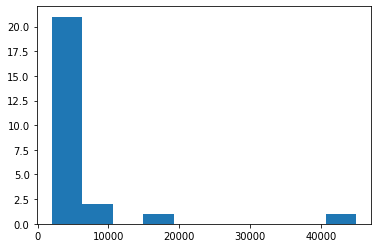

In [27]:
plt.hist(income);

In [28]:
print('Arithmetical average ', round(statistics.mean(income)))
print('Median ', round(statistics.median(income)))
print('Mode ', round(statistics.mode(income)))

Arithmetical average  5700
Median  3000
Mode  2000


Huff D. How To Lie With Statistics, 1954.

### Об ограниченности статистик

In [16]:
import pandas as pd
data = pd.read_csv('Graphs.csv', sep =';', decimal=',')
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


Вычислите среднее арифмитическое, дисперсию, корреляцию между $x_i$ и $y_i$. Почему вы получаете такие значения? Обоснуйте ваши суждения с помощью диаграммы рассеяния.

In [22]:
round(data.describe(),2)[:3]

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,9.00,9.00,9.00,9.00,7.50,7.50,7.50,7.50
std,3.32,3.32,3.32,3.32,2.03,2.03,2.03,2.03


In [85]:
data.corr().iloc[:4, -4:].round(decimals=2)

,y1,y2,y3,y4
x1,0.82,0.82,0.82,-0.31
x2,0.82,0.82,0.82,-0.31
x3,0.82,0.82,0.82,-0.31
x4,-0.53,-0.72,-0.34,0.82


In [84]:
np.diag(data.corr().iloc[:4, -4:].round(decimals=2))

array([0.82, 0.82, 0.82, 0.82])

In [35]:
def line_plot(ax, x, y):
    ax.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
             color = 'r')

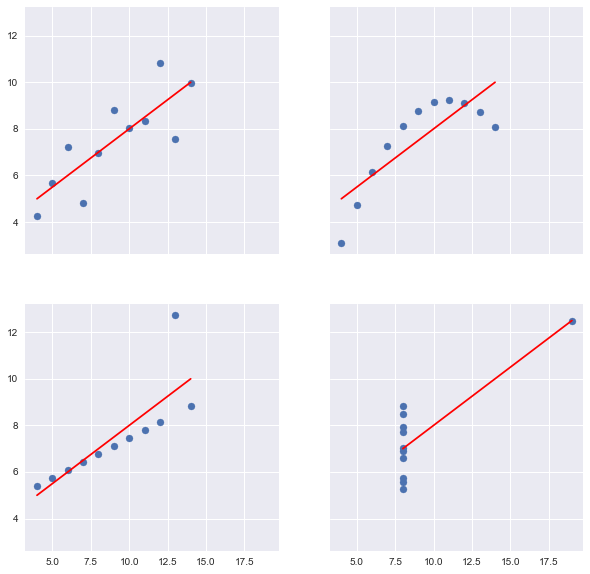

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(10,10))
axes[0, 0].scatter(data['x1'], data['y1'])
line_plot(axes[0, 0], data['x1'], data['y1'])
axes[0, 1].scatter(data['x2'], data['y2'])
line_plot(axes[0, 1], data['x2'], data['y2'])
axes[1, 0].scatter(data['x3'], data['y3'])
line_plot(axes[1, 0], data['x3'], data['y3'])
axes[1, 1].scatter(data['x4'], data['y4'])
line_plot(axes[1, 1], data['x4'], data['y4'])

Anscombe F.J. (1973). Graphs in Statistical Analysis. American Statistician, 27(1): 17–21.

______